In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [86]:
files_csv = "../project_1/Resources/data_cleaned_2021.csv"

In [87]:
df = pd.read_csv(files_csv)
df.head()

,Job Title,Salary,Company Name,Rating,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Lower Salary,Upper Salary,Avg Salary(K),Job Location
0,Data Scientist,$53K-$91K,Tecolote Research\n3.8,3.8,"Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53,91,72.0,NM
1,Healthcare Data Scientist,$63K-$112K,University of Maryland Medical System\n3.4,3.4,"Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63,112,87.5,MD
2,Data Scientist,$80K-$90K,KnowBe4\n4.8,4.8,"Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,80,90,85.0,FL
3,Data Scientist,$56K-$97K,PNNL\n3.8,3.8,"Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",56,97,76.5,WA
4,Data Scientist,$86K-$143K,Affinity Solutions\n2.9,2.9,"New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",86,143,114.5,NY


In [88]:
df["Salary"] = df["Salary"].str.replace('$', '')
df['Salary'] = df['Salary'].str.replace('K', '')
df['Salary'] = df['Salary'].str.replace('Employer', '')
df['Salary'] = df['Salary'].str.replace('(', '')
df["Salary"]

/var/folders/7z/2_ssh4pj4dl6pp5615v67s5w0000gn/T/ipykernel_82156/519797774.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Salary"] = df["Salary"].str.replace('$', '')
/var/folders/7z/2_ssh4pj4dl6pp5615v67s5w0000gn/T/ipykernel_82156/519797774.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Salary'] = df['Salary'].str.replace('(', '')


0       53-91
1      63-112
2       80-90
3       56-97
4      86-143
        ...  
737    58-111
738    72-133
739     56-91
740    95-160
741    61-126
Name: Salary, Length: 742, dtype: object

In [89]:
df[['Min Salary','Max Salary']] = df.Salary.str.split('-',expand=True)
df.head(2)

,Job Title,Salary,Company Name,Rating,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Lower Salary,Upper Salary,Avg Salary(K),Job Location,Min Salary,Max Salary
0,Data Scientist,53-91,Tecolote Research\n3.8,3.8,"Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,53,91,72.0,NM,53,91
1,Healthcare Data Scientist,63-112,University of Maryland Medical System\n3.4,3.4,"Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,63,112,87.5,MD,63,112


In [90]:
data_df = df.drop(columns=['Competitors', 'Founded'])
data_df.head(2)

,Job Title,Salary,Company Name,Rating,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Lower Salary,Upper Salary,Avg Salary(K),Job Location,Min Salary,Max Salary
0,Data Scientist,53-91,Tecolote Research\n3.8,3.8,"Goleta, CA",501 - 1000,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),53,91,72.0,NM,53,91
1,Healthcare Data Scientist,63-112,University of Maryland Medical System\n3.4,3.4,"Baltimore, MD",10000+,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),63,112,87.5,MD,63,112


In [91]:
data_df.isnull().any()

Job Title            False
Salary               False
Company Name         False
Rating               False
Headquarters         False
Size                 False
Type of ownership    False
Industry             False
Sector               False
Revenue              False
Lower Salary         False
Upper Salary         False
Avg Salary(K)        False
Job Location         False
Min Salary           False
Max Salary            True
dtype: bool

In [92]:
data_df = data_df.dropna()
data_df.isnull().any()

Job Title            False
Salary               False
Company Name         False
Rating               False
Headquarters         False
Size                 False
Type of ownership    False
Industry             False
Sector               False
Revenue              False
Lower Salary         False
Upper Salary         False
Avg Salary(K)        False
Job Location         False
Min Salary           False
Max Salary           False
dtype: bool

In [93]:
data_df['Salary'] = data_df['Salary'].str.replace('Employer', '')

In [94]:
data_df.columns

Index(['Job Title', 'Salary', 'Company Name', 'Rating', 'Headquarters', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Lower Salary',
       'Upper Salary', 'Avg Salary(K)', 'Job Location', 'Min Salary',
       'Max Salary'],
      dtype='object')

In [95]:
data_df.sort_values(by=['Avg Salary(K)'], ascending=False, inplace=True),
industry_df = data_df[['Sector', 'Min Salary', 'Max Salary']].head(6)
industry_df[['Min Salary', 'Max Salary']] = industry_df[['Min Salary', 'Max Salary']].apply(pd.to_numeric)
industry_df = industry_df.set_index('Sector')
industry_df = industry_df.drop_duplicates()
industry_df

,Min Salary,Max Salary
Sector,,
Insurance,202,306
Business Services,200,275
Information Technology,176,289
Health Care,171,272


<function matplotlib.pyplot.show(close=None, block=None)>

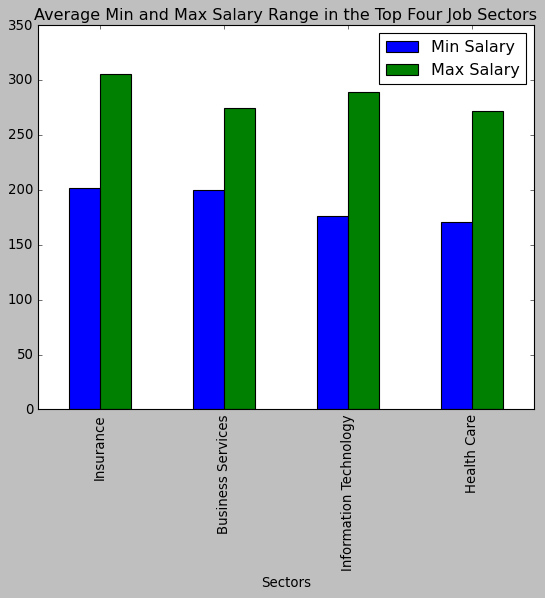

In [103]:
industry_df.plot(kind='bar')


plt.xlabel("Sectors")
plt.xticks(rotation=90)
# plt.ylabel("Dollars in Thousands")
plt.title('Average Min and Max Salary Range in the Top Four Job Sectors')
plt.savefig("MINandMaxSalarySector-Xilonem.jpg")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

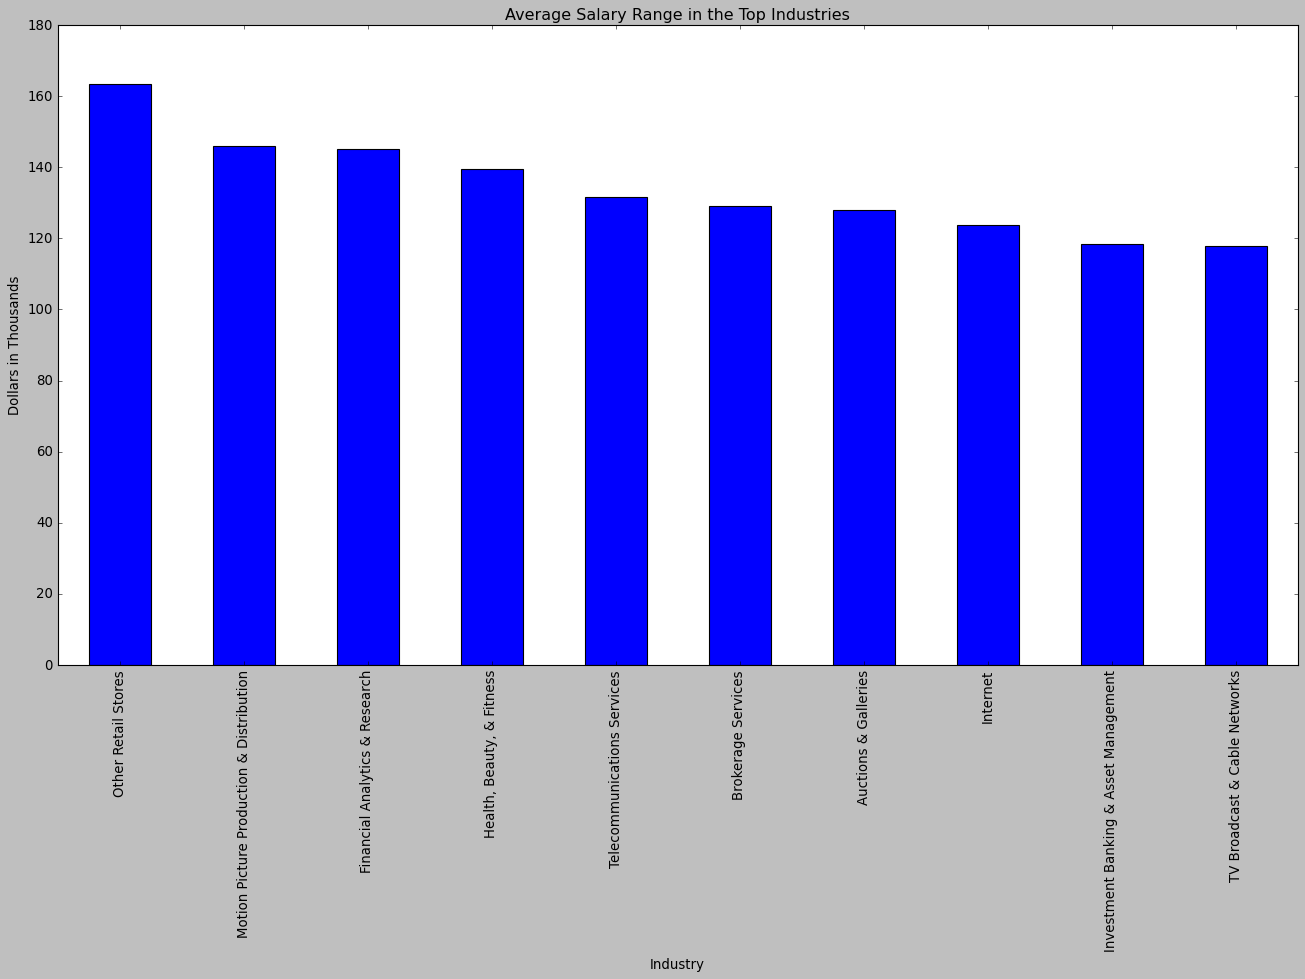

In [97]:
avg_df = data_df.groupby(['Industry'])['Avg Salary(K)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(20,10))

avg_df.plot(kind='bar')
plt.xlabel("Industry")
plt.xticks(rotation=90)
plt.ylabel("Dollars in Thousands")
plt.title('Average Salary Range in the Top Industries')
plt.savefig("AverageSalary10-Xilonem.jpg")
plt.show

In [98]:
data_df[['Industry', 'Avg Salary(K)']]

,Industry,Avg Salary(K)
528,Insurance Carriers,254.0
708,Insurance Carriers,254.0
354,Insurance Carriers,254.0
103,Consulting,237.5
429,Computer Hardware & Software,232.5
...,...,...
538,Enterprise Software & Network Solutions,37.5
47,Enterprise Software & Network Solutions,29.5
618,Financial Transaction Processing,27.5
409,Financial Transaction Processing,27.5


<function matplotlib.pyplot.show(close=None, block=None)>

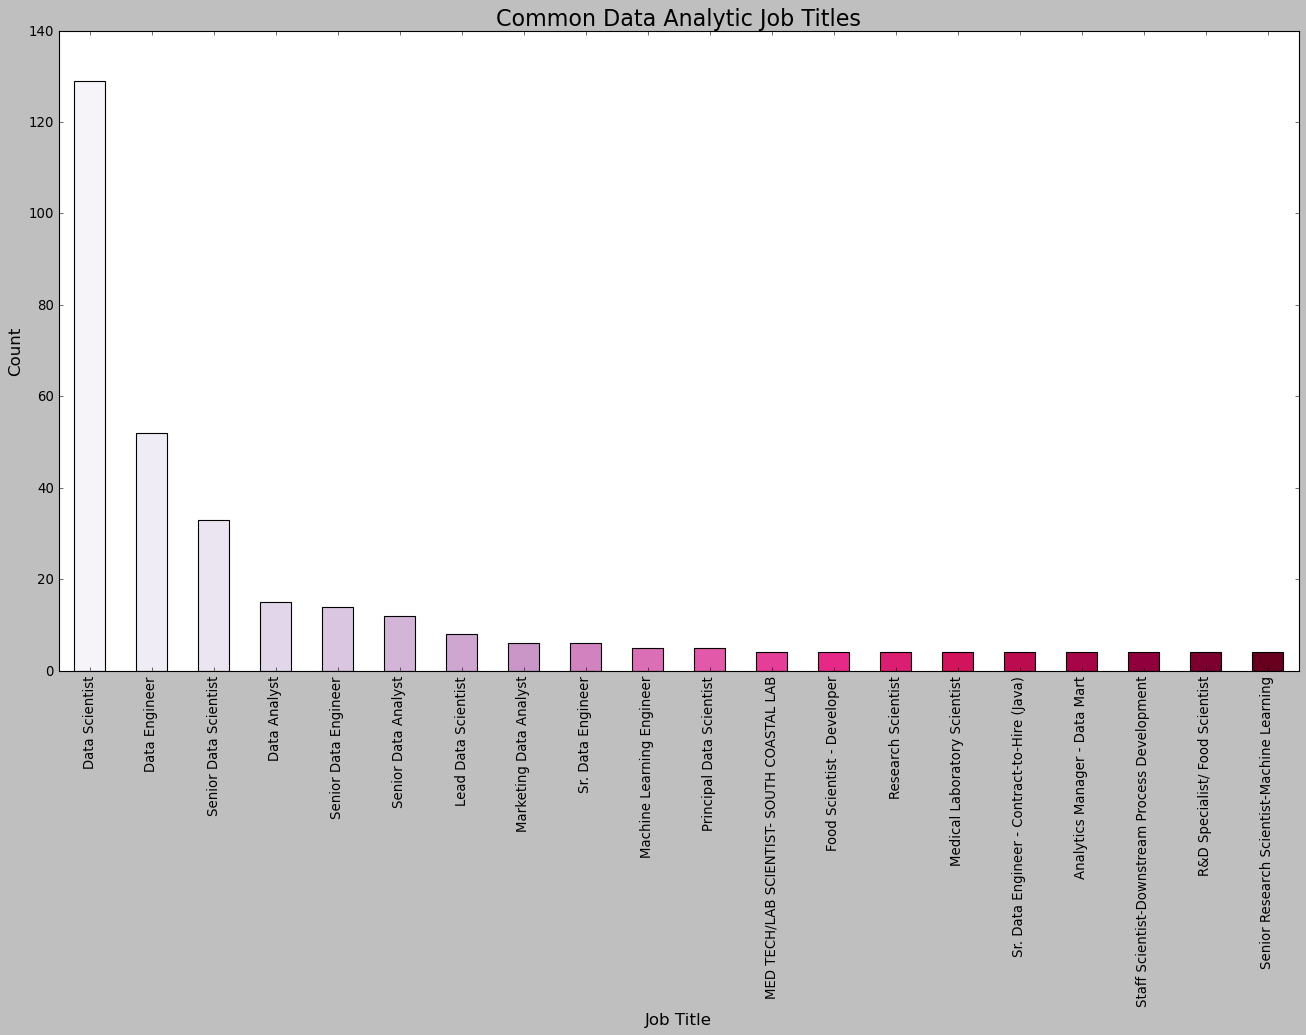

In [99]:
plt.figure(figsize=(20,10))
plt.style.use("classic")
color = plt.cm.PuRd(np.linspace(0,1,20))
data_df["Job Title"].value_counts().sort_values(ascending=False).head(20).plot.bar(color=color)
plt.title("Common Data Analytic Job Titles",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("Job Title",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.savefig("Top20CommonJobPosition-Xilonem.jpg")
plt.show

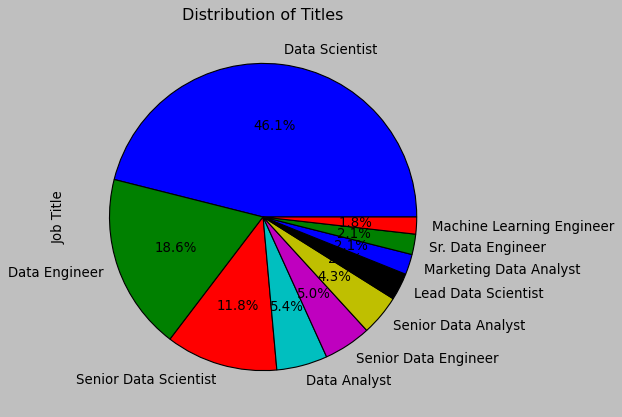

In [100]:

title_list = data_df['Job Title'].value_counts().head(10)

title_list

title_list.plot(kind="pie",autopct="%1.1f%%", title="Distribution of Titles" )
plt.show()

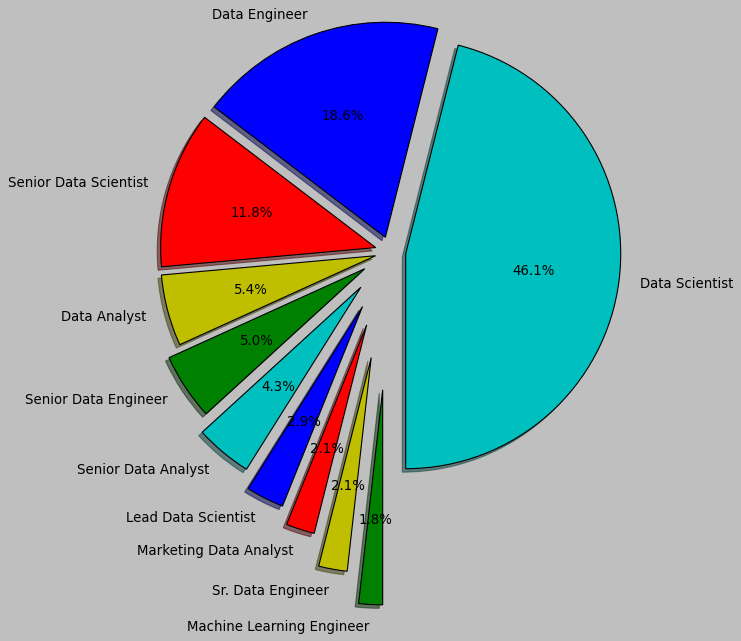

In [101]:
classes = title_list.index
explode = [0.1, 0.1, 0.1, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9]
 # To slice the perticuler section\n",
colors = ["c", 'b', 'r', 'y', 'g'] 
# Color of each section
textprops = {"fontsize":12} 
# Font size of text in pie chart\n",
plt.pie(title_list, labels = classes, explode = explode,colors =colors,autopct = "%1.1f%%", shadow = True, radius = 1.4, startangle = 270, textprops =textprops) 
plt.savefig("AnalyticsPieChart-Xilonem.jpg")

plt.show() 